<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Computer-Vision/blob/main/2348505_CV_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement various image enhancement techniques using Built-in and user defined functions.**

**1. Image Negative**

**2. Gray Level Slicing**

**3. Histogram Equalization**

**Importing Necessary Libraries**

In [18]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

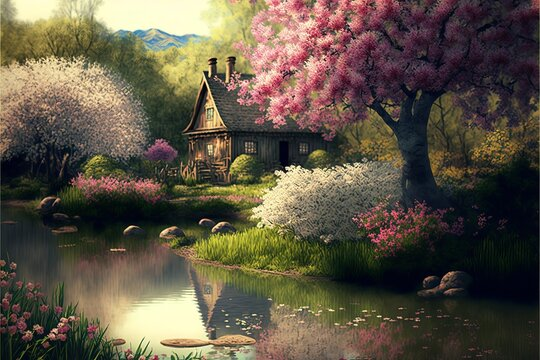

In [3]:
#Printing the original image
img_bgr = cv2.imread('img13.jpg')
cv2_imshow(img_bgr)

**1. IMAGE NEGATIVE**

---

When we try to negatively transform an image, the brightest areas are transformed into the darkest and the darkest areas are transformed into the brightest. As we know, a color image stores 3 different channels. They are red, green and blue. That’s why color images are also known as RGB images. So, if we need a negative transformation of an image then we need to invert these 3 channels.

**First method:**

---
1. Read an image
2. Get height and width of the image
3. Each pixel contains 3 channels. So, take a pixel value and collect 3 channels in 3 different variables.
4. Negate 3 pixels values from 255 and store them again in pixel used before.
5. Do it for all pixel values present in image.

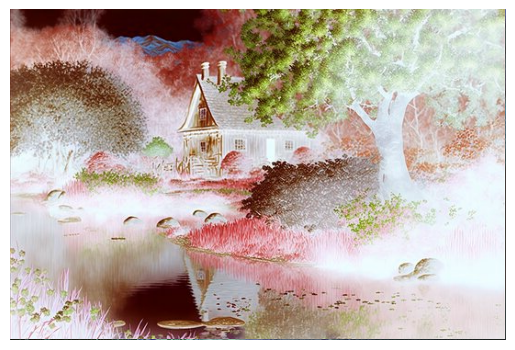

In [4]:
height, width, _ = img_bgr.shape
for i in range(0, height - 1):
	for j in range(0, width - 1):
		pixel = img_bgr[i, j]
		pixel[0] = 255 - pixel[0]
		pixel[1] = 255 - pixel[1]
		pixel[2] = 255 - pixel[2]
		img_bgr[i, j] = pixel
plt.imshow(img_bgr)
plt.axis('off')
plt.show()

**2nd method:**

1. Read an image and store it in a variable.
2. Subtract the variable from 1 and store the value in another variable.

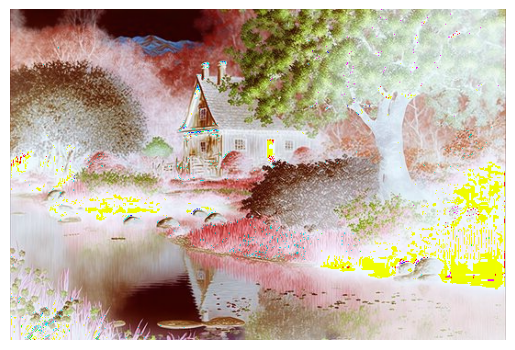

In [12]:
# Negate the original image
img_bgr = cv2.imread('img13.jpg',1)
img_neg = 1 - img_bgr
plt.imshow(img_neg)
plt.axis('off')
plt.show()

For colored images, we will subtract 255 from all the values of all 3 channels (RGB) and take its absolute value (positive value).
For a grayscale image, we have just 1 channel and there also we will subtract 255 from those pixel values (pixel value ranges from 0–255 in grayscale images) and take absolute values.
We can consider negative images as the exact opposite of the original images, if we add both, the original image and the negative image, we will get a pure white image.

In [6]:
img = cv2.imread("img13.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.imread("img13.jpg", 0)
colored_negative = abs(255-img)
gray_negative = abs(255-gray)

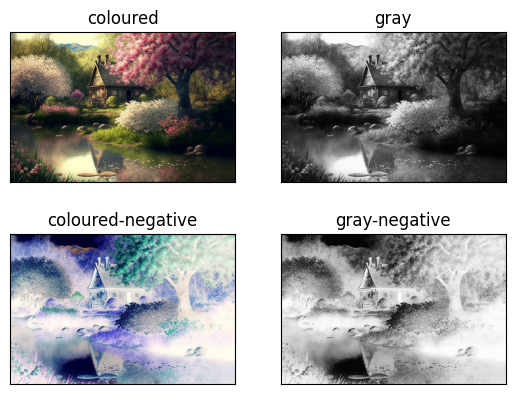

In [7]:
imgs = [img, gray, colored_negative, gray_negative]
title = ['coloured', 'gray', 'coloured-negative', 'gray-negative']
plt.subplot(2, 2, 1)
plt.title(title[0])
plt.imshow(imgs[0])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.title(title[1])
plt.imshow(imgs[1], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.title(title[2])
plt.imshow(imgs[2])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.title(title[3])
plt.imshow(imgs[3], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()

**Bitwise NOT operation on Image:**

---
Inversion of input array elements.

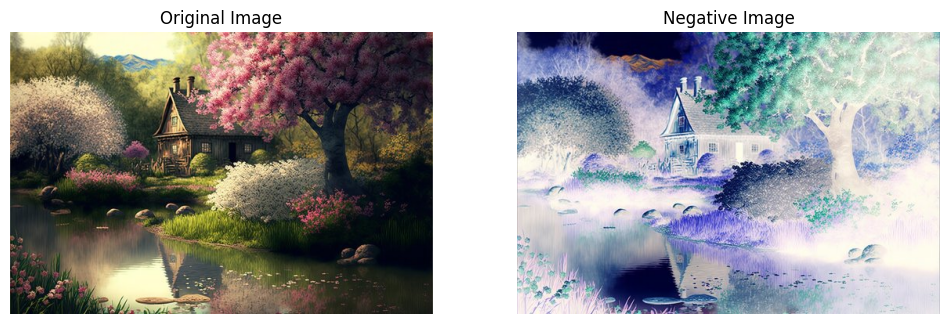

In [15]:
image = cv2.imread('img13.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
negative_image = cv2.bitwise_not(image_rgb)
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Negative Image")
plt.imshow(negative_image, cmap='gray')
plt.axis('off')
plt.show()

**GRAY LEVEL SLICING**

---
Gray level slicing, also known as intensity slicing or contrast stretching, is a technique used in image processing to enhance the contrast of an image by selectively highlighting a specific range of gray levels. This technique is particularly useful when the contrast in an image is low, making it difficult to distinguish between different objects or features.

The process of gray level slicing involves setting a threshold range of gray levels and then mapping all pixel values within that range to a new value, while leaving the pixel values outside the range unchanged. This effectively stretches the contrast of the image, making the objects or features within the specified gray level range more distinguishable.


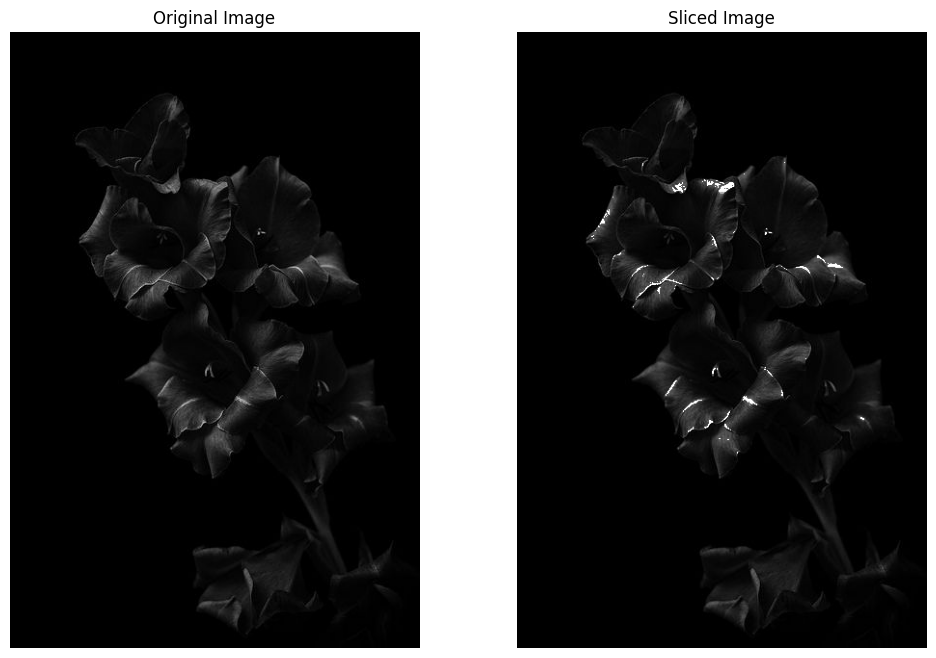

In [26]:
def gray_level_slicing(image, lower_threshold, upper_threshold, highlight_value):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = np.logical_and(gray_image >= lower_threshold, gray_image <= upper_threshold)
    gray_image[mask] = highlight_value
    return gray_image

image = cv2.imread('img15.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sliced_image = gray_level_slicing(image, 100, 200, 255)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sliced Image")
plt.imshow(sliced_image, cmap='gray')
plt.axis('off')
plt.show()

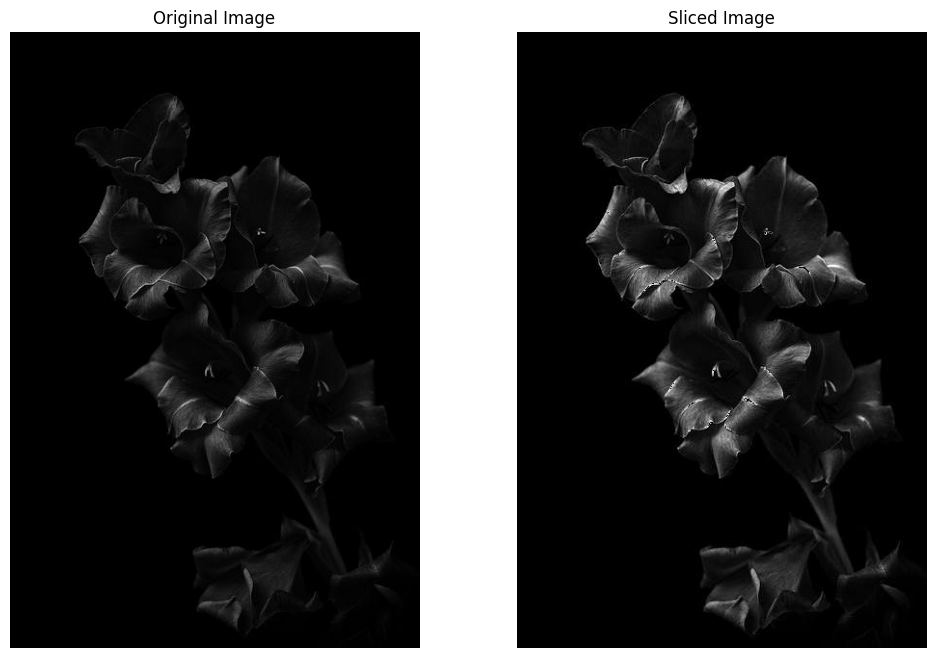

In [24]:
image = cv2.imread('img15.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = cv2.inRange(gray_image, 0,150)
sliced_image = cv2.bitwise_and(gray_image, gray_image, mask=mask)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sliced Image")
plt.imshow(sliced_image, cmap='gray')
plt.axis('off')
plt.show()

**Histogram Equalization**

---



**Global Histogram Equalization:**

---




Global Histogram Equalization is a technique used in image processing to enhance the contrast of an image by redistributing the intensity values of the pixels. It works by transforming the intensity values of the pixels in such a way that the cumulative distribution function (CDF) of the intensity values becomes linear. This results in a more evenly distributed histogram, which in turn enhances the contrast of the image.

The process of global histogram equalization involves the following steps:

1. **Compute the Histogram**: Calculate the histogram of the image, which is a plot of the frequency of occurrence of each intensity value.

2. **Compute the Cumulative Distribution Function (CDF)**: Calculate the cumulative sum of the histogram values, which represents the cumulative distribution of the intensity values.

3. **Normalize the CDF**: Normalize the CDF to the range [0, 1] by dividing each value by the total number of pixels in the image.

4. **Compute the Transformation Function**: Compute the transformation function by multiplying the normalized CDF by the maximum intensity value (e.g., 255 for an 8-bit image).

5. **Apply the Transformation**: Apply the transformation function to each pixel in the image to obtain the equalized image.

Global histogram equalization is a powerful technique for enhancing the contrast of an image, especially when the image has low contrast or when the histogram is skewed towards a particular intensity range. It is particularly useful in applications where the contrast of the image is critical for analysis and interpretation, such as medical imaging, satellite imaging, and surveillance.

However, it is important to note that global histogram equalization can also amplify noise in the image, especially in regions with low contrast. Therefore, it should be used with caution, and other techniques such as local histogram equalization or adaptive histogram equalization may be more appropriate in certain cases.

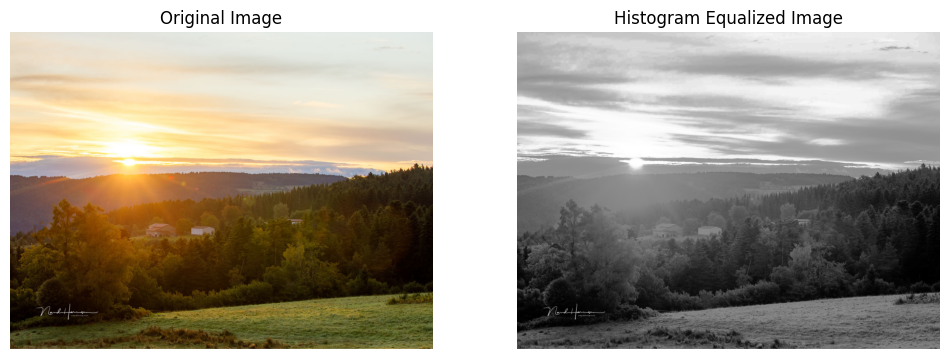

In [35]:
def global_histogram_equalization(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    return equalized_image

image = cv2.imread('img17.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

equalized_image = global_histogram_equalization(image)
equalized_image_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_image_rgb)
plt.axis('off')
plt.show()

**Adaptive Histogram Equalization:**

---



Adaptive Histogram Equalization (AHE) is an extension of the traditional Histogram Equalization (HE) technique used in image processing. While HE applies a single transformation to the entire image, AHE divides the image into smaller regions and applies HE independently to each region. This allows AHE to adapt to local variations in contrast and illumination, making it particularly effective for images with uneven lighting conditions or regions of varying contrast.

The process of Adaptive Histogram Equalization involves the following steps:

1. **Divide the Image into Tiles**: The image is divided into non-overlapping tiles or blocks of a fixed size.

2. **Apply Histogram Equalization to Each Tile**: Histogram Equalization is applied independently to each tile, resulting in a locally enhanced image.

3. **Combine the Enhanced Tiles**: The locally enhanced tiles are combined to form the final equalized image.

AHE is particularly useful in the following scenarios:

1. **Images with Uneven Lighting**: AHE can effectively enhance the contrast of images with uneven lighting conditions, such as images captured under varying illumination or images with shadows.

2. **Images with Varying Contrast**: AHE can enhance the contrast of images with regions of varying contrast, such as images with both bright and dark regions.

3. **Images with Specific Features**: AHE can enhance the contrast of specific features or objects of interest in the image, making them more prominent and easier to analyze.

4. **Medical Imaging**: AHE is commonly used in medical imaging, where it can enhance the contrast of specific structures or tissues in the image, making them more visible and aiding in diagnosis.

It is important to note that AHE can also amplify noise in the image, especially in regions with low contrast. Therefore, it should be used with caution, and other techniques such as Contrast Limited Adaptive Histogram Equalization (CLAHE) may be more appropriate in certain cases. CLAHE limits the amplification of noise by clipping the histogram at a specified threshold, preventing excessive amplification of noise in low-contrast regions.

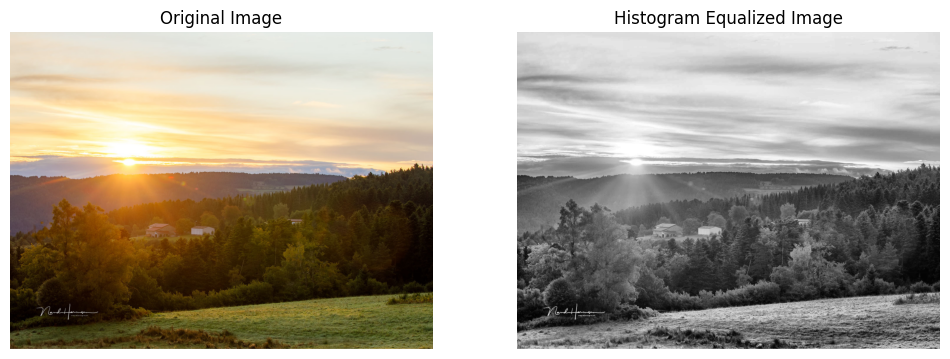

In [34]:
image = cv2.imread('img17.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image = clahe.apply(gray_image)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_image,"gray")
plt.axis('off')
plt.show()